In [43]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import pickle
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('99acres_data.csv')
df.head()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0


Numbers of Area Type :

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<AxesSubplot:xlabel='build_up_area', ylabel='count'>

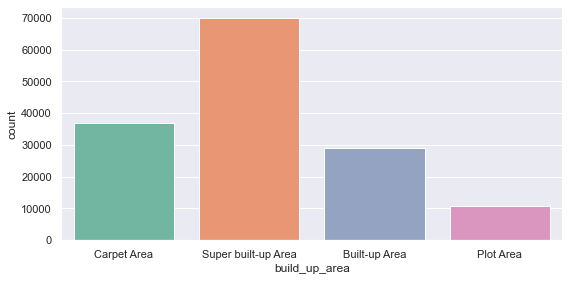

In [45]:
print("Numbers of Area Type :")
print()
print(df['build_up_area'].value_counts())
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x='build_up_area', data=df, palette = 'Set2')

<AxesSubplot:>

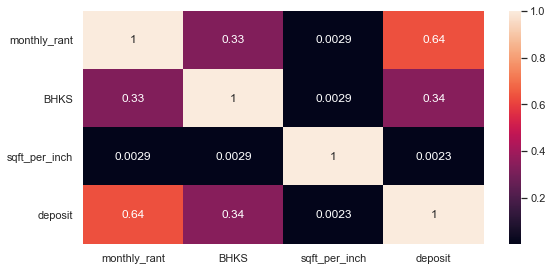

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df.describe(include='all')

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,146528,1.465280e+05,146528.000000,146528,1.465280e+05,146528,146528,146528,1.465280e+05
unique,8,NaN,NaN,41,NaN,4,7,12555,NaN
top,ncr,NaN,NaN,2 Baths,NaN,Super built-up Area,Residential,Goregaon (East),NaN
freq,42016,NaN,NaN,68767,NaN,69918,102024,807,NaN
mean,NaN,3.414242e+04,2.159703,NaN,2.463806e+03,NaN,NaN,NaN,1.203667e+05
std,NaN,8.428243e+04,1.107673,NaN,1.816119e+05,NaN,NaN,NaN,2.937736e+05
min,NaN,5.000000e+02,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.300000e+04,1.000000,NaN,6.800000e+02,NaN,NaN,NaN,3.000000e+04
50%,NaN,2.000000e+04,2.000000,NaN,1.057000e+03,NaN,NaN,NaN,6.000000e+04
75%,NaN,3.290000e+04,3.000000,NaN,1.500000e+03,NaN,NaN,NaN,1.250000e+05


In [48]:
#data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146528 entries, 0 to 146527
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      146528 non-null  object 
 1   monthly_rant              146528 non-null  float64
 2   BHKS                      146528 non-null  float64
 3   Baths                     146528 non-null  object 
 4   sqft_per_inch             146528 non-null  int64  
 5   build_up_area             146528 non-null  object 
 6   Type_of_property          146528 non-null  object 
 7   location_of_the_property  146528 non-null  object 
 8   deposit                   146528 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ MB


In [49]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [50]:
df.drop(['Baths','location_of_the_property'],axis=1,inplace=True)

In [51]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [52]:
df = df[df.Type_of_property!='for']
df = df[df.Type_of_property!='Serviced']
df = df[df.Type_of_property!='Floor']

In [53]:
df['monthly_rant']=np.log1p(df['monthly_rant'])

<AxesSubplot:xlabel='monthly_rant', ylabel='Density'>

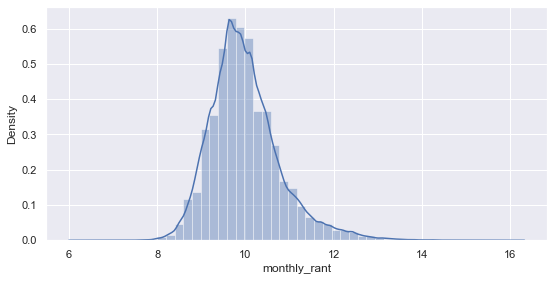

In [54]:
sns.distplot(df['monthly_rant'])

In [55]:
cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
#l_o_t_p = LabelEncoder()


df['city'] = cty.fit_transform(df['city'])
df['build_up_area'] = b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])
#df['location_of_the_property'] = l_o_t_p.fit_transform(df['location_of_the_property'])
                                             


In [56]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property", df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()
#print("location_of_the_property",df['location_of_the_property'].unique())
#print(l_o_t_p.inverse_transform(list(df['location_of_the_property'].unique())))


city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [57]:
df.head()

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,deposit
0,5,9.770013,1.0,470,1,2,75000.0
1,5,11.225257,3.0,1800,3,2,400000.0
2,5,11.002117,2.0,950,3,2,200000.0
3,5,10.859018,3.0,1300,1,2,300000.0
4,5,10.308986,1.0,550,0,2,150000.0


In [58]:
#seperating the variable independent matrix x and dependent vector y
x = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [59]:
#spliting dataset into testing and training dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('Shape of ytrain {}'.format(ytrain.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (116827, 6)
Shape of xtest (29207, 6)
Shape of ytrain (116827,)
Shape of ytest (29207,)


In [61]:
# data normalization

st=StandardScaler()
xtrain_scaled = st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

In [69]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('**Linear Regression model**')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [70]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf = RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('**Random Forest Regressor Model**')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

In [71]:
def gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=(gb.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('**Gradient Boosting Regressor Model**')
    print('Score for Gradient Boosting Regressor Model is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor Model is {}'.format(rmse))

In [76]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('_'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('_'*100)
    gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('_'*100)

In [77]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

**Linear Regression model**
Score for Linear Regression model is 0.47784477380544776
RMSE for Linear Regression model is 0.5741257717584949
____________________________________________________________________________________________________
**Random Forest Regressor Model**
Score for Random Forest Regressor Model is 0.8945796953715159
RMSE for Random Forest Regressor Model is 0.2579700934881391
____________________________________________________________________________________________________
**Gradient Boosting Regressor Model**
Score for Gradient Boosting Regressor Model is 0.877853968570921
RMSE for Gradient Boosting Regressor Model is 0.27768147540624155
____________________________________________________________________________________________________


In [78]:
pickle.dump(rf, open('rf_rand_model.pkl','wb'))

NameError: name 'rf' is not defined